# 📊 Model Impact Plots:

Barplot to show the impact of model choice using TIFGSM attack as an example

In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plots Parameters
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### 1) Load Data

In [3]:
# Paths
DATA_PATH   = '../results/attacks/evaluation/'
RESULTS_PATH = './figures/'

TASKS_LIST = ["bikeMotorbike","catDog","manWoman"]
ATTACK     = "TIFGSM"

In [4]:
taskListDF = []
for task in TASKS_LIST:
    taskDF = pd.read_csv(DATA_PATH + "{}/evaluations_{}.csv".format(task,ATTACK))
    taskDF['Dataset'] = task
    taskListDF.append(taskDF)
df = pd.concat(taskListDF)

### 2) 📊 Plot

In [5]:
COLORS = ["#1F8A70", "#FC7300","#62CDFF"]

In [6]:
# Renaming
df = df.rename(columns={'target_model': 'Target Model','source_model': 'Source Model' })

for c in ['Target Model','Source Model']:
    df[c] = df[c].str.replace("vgg","VGG")
    df[c] = df[c].str.replace("resnet","ResNet")
    df[c] = df[c].str.replace("alexnet","AlexNet")

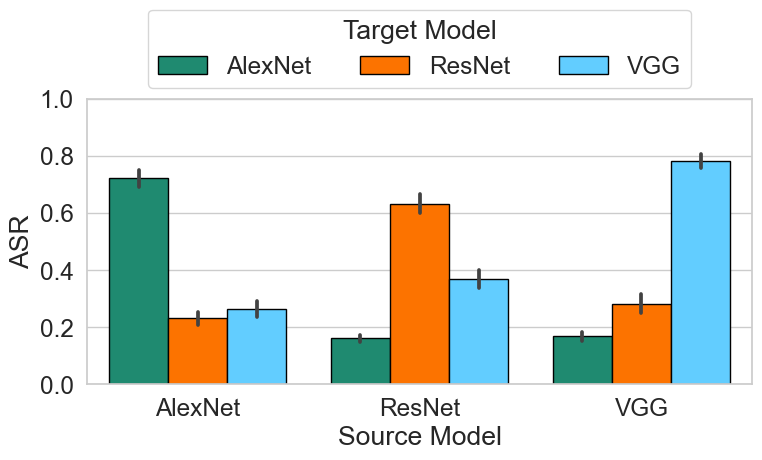

In [7]:
sns.set(style="whitegrid", font_scale=1.6, palette=sns.color_palette(COLORS, desat=None))

fig, ax = plt.subplots(figsize=(8, 5))
bar_plot = sns.barplot(data=df, x = 'Source Model', y = 'asr', hue ='Target Model',saturation=1, ax=ax, edgecolor="black")

# Legend
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower center', ncol=3, borderaxespad=0.2)
leg._legend_box.align = "left"
leg.set_title("Target Model")
leg._legend_box.align = "center"

# Axis labels
plt.ylim(0, 1)
plt.xlabel("Source Model")
plt.ylabel("ASR")

plt.tight_layout()
plt.savefig(RESULTS_PATH + "models_impact.pdf")